In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../src/')

In [3]:
import helpers as h

In [4]:
n_samples = 100
L = int(1e8)
w = int(1e3)
lim = L//(10*w)
print(lim)
pos = w*(np.arange(L//w)+0.5)
dist = w*np.arange(lim + 1)

10000


In [5]:
N = 1e3
mu_n = 1e-7
r = 1e-8
pi_0 = 2*N*mu_n
seg_0 = 2*mu_n * N * np.sum(1.0/np.arange(1,n_samples))
print(pi_0)
print(seg_0)

0.00019999999999999998
0.00103547550353


In [11]:
fn_pattern = '../simulations/slim/sweeps_fsel-{}_rep-{}.wsfs.txt.gz'

In [190]:
n_files = 100
fsel = 0.00001
lo_max = 10
#fsel = 0.0001

sfs = np.zeros(n_samples//2)
pi_corr = np.zeros(lim + 1)
lohi_corr = np.zeros((lo_max, lim + 1))
for i in range(n_files):
    wsfs = h.loadints(fn_pattern.format(fsel, i), (n_samples+1)//2, L//w)
    
    sfs += np.sum(wsfs, axis=1)
    
    pi_w = h.sfs2pi(wsfs, n_samples) / w
    pi_corr += h.cross_correlation(pi_w, pi_w, lim)
    
    for freq_cutoff in range(1, lo_max + 1):
        lo = np.sum(wsfs[:freq_cutoff,:], axis=0) / w
        hi = np.sum(wsfs[freq_cutoff:,:], axis=0) / w
        lohi_corr[freq_cutoff-1] += h.cross_correlation(lo, hi, lim)

    if (i+1) % 10 == 0:
        print(i+1, 'files processed.')
sfs /= n_files*L
pi_corr /= n_files
lohi_corr /= n_files

10 files processed.
20 files processed.
30 files processed.
40 files processed.
50 files processed.
60 files processed.
70 files processed.
80 files processed.
90 files processed.
100 files processed.


In [191]:
pi_mean = h.sfs2pi(sfs, n_samples)
lo_mean = np.cumsum(sfs)[:lo_max]
hi_mean = np.sum(sfs) - lo_mean

In [192]:
print(pi_mean, pi_mean / pi_0)
print(lo_mean, lo_mean / pi_0)
print(hi_mean+lo_mean, (hi_mean+lo_mean)/seg_0)

0.000169389735778 0.846948678889
[ 0.00018933  0.00028766  0.00035323  0.00040216  0.00044144  0.00047417
  0.00050218  0.00052682  0.00054903  0.00056865] [ 0.946667   1.43829    1.766136   2.0107845  2.207187   2.3708525
  2.510918   2.634076   2.745157   2.843262 ]
[ 0.00092603  0.00092603  0.00092603  0.00092603  0.00092603  0.00092603
  0.00092603  0.00092603  0.00092603  0.00092603] [ 0.89430469  0.89430469  0.89430469  0.89430469  0.89430469  0.89430469
  0.89430469  0.89430469  0.89430469  0.89430469]


In [193]:
print(lo_mean*w)
print(hi_mean*w)
print(lo_mean/(lo_mean+hi_mean))

[ 0.1893334  0.287658   0.3532272  0.4021569  0.4414374  0.4741705
  0.5021836  0.5268152  0.5490314  0.5686524]
[ 0.7366972  0.6383726  0.5728034  0.5238737  0.4845932  0.4518601
  0.423847   0.3992154  0.3769992  0.3573782]
[ 0.20445696  0.31063552  0.38144225  0.43428036  0.4766985   0.51204625
  0.54229698  0.5688961   0.59288689  0.61407517]


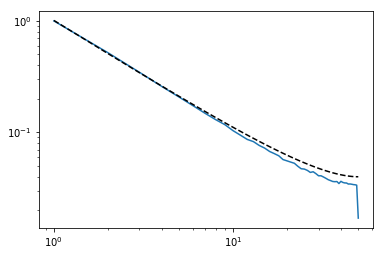

In [194]:
x = np.arange(1,n_samples//2 + 1)
plt.loglog(x, sfs/sfs[0])
plt.loglog(x, 1/x + 1/(n_samples - x), '--k')

In [195]:
dc = 2*mu_n/(pi_mean*r)
print(dc)

118070.908536


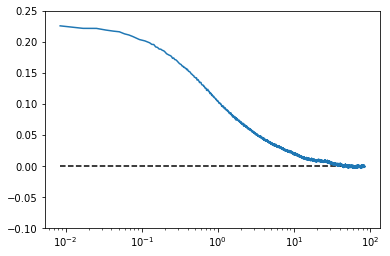

In [196]:
plt.semilogx(dist/dc, pi_corr/pi_mean**2)
plt.ylim([-0.1, 0.25])
plt.hlines(0, dist[1]/dc, dist[-1]/dc, linestyle='dashed')

1


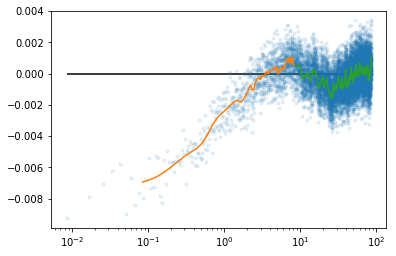

2


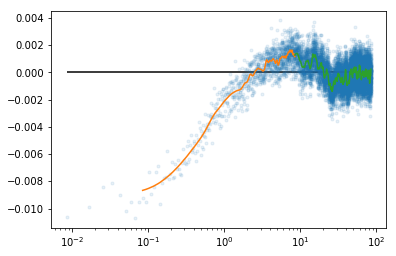

3


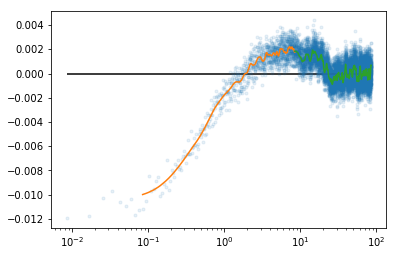

4


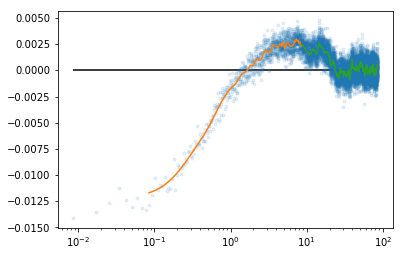

5


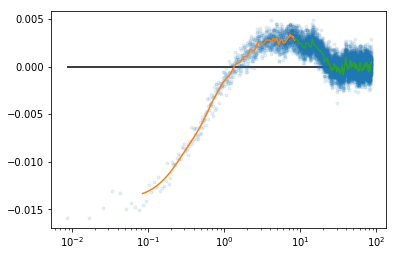

6


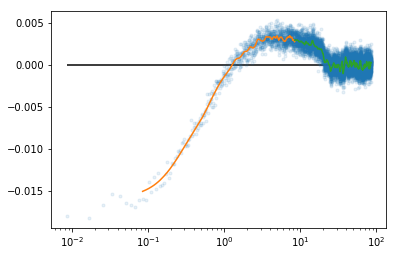

7


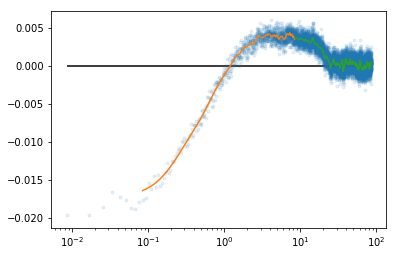

8


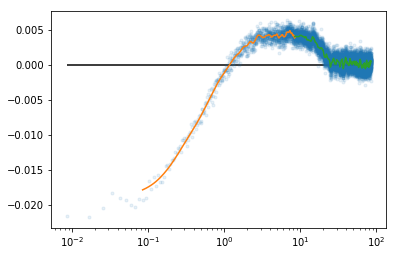

9


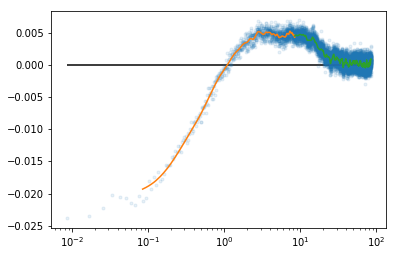

10


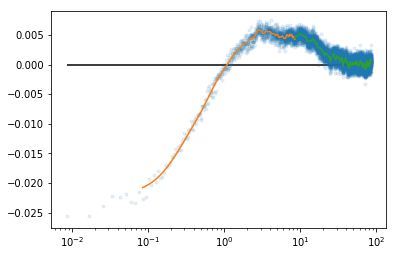

In [197]:
swp = 1000
x = dist / dc
for i in range(lo_max):
    plt.figure()
    print(i+1)
    
    y = lohi_corr[i,:] / (lo_mean[i]*hi_mean[i])
    sm1 = h.smooth(y, window_len=51)
    sm2 = h.smooth(y, window_len=101)
    
    plt.semilogx(x, y, '.', alpha=0.1)
    plt.semilogx(x[10:swp], sm1[10:swp])
    plt.semilogx(x[swp:], sm2[swp:])
    plt.hlines(0, x[1], x[-1])
    plt.show()

# Test the behavior of correlate for sparse data

-1.17605547593e-05


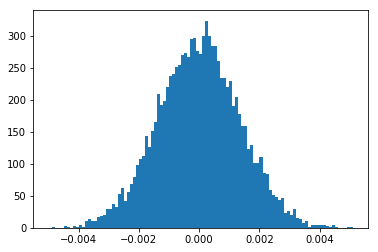

In [10]:
l = int(1e5)
X = np.random.poisson(0.2, l)
Y = np.random.poisson(0.8, l)
Z = h.cross_correlation(X, Y, l//10)
#print(X)
#print(Y)
#print(Z)
plt.hist(Z, bins=np.arange(-0.005, 0.0051, 0.0001))
print(np.mean(Z))

In [ ]:
X = np.arange(10)
w = np.ones(4)
Y = np.convolve(X,w,'valid')
print(X)
print(Y)
print(len(Y))